# Plot the ClassyFire molecule classes against the ranking-changes (improvements)

For each MS-tuple in MassBank the ClassyFire molecule class (superclass- and class-level) has been determined. We also can provide the rank of the correct molecular structure within each candidate set for each MS-tuple. Two rankings are given: 

1) **Only MS**: Candidates are ranked based on the respective MS2 scoring method (MetFrag, SIRIUS or CFM-ID)
2) **LC-MS$^2$Struct**: Ranking based on the max-marginals integrating the MS2 and retention order (RO) scores

The analysis here consideres the rank-improvements (LC-MS$^2$Struct over Only MS) aggregated for each ClassyFire class, i.e. at superclass-level or class-level.

For the **LC-MS$^2$Struct** ranking we aggregated eight (8) marginals by averaging the output of eight (8) different SSVM.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from ssvm_evaluation.utils import dict2fn
from ssvm_evaluation.plotting_utils import plot__02__a, plot__02__b

## Load Results

Candidate scores are aggregated by **InChIKey-1**.

In [2]:
def ndarray_converter(x: str):
    """
    Convert list with two items stored an a CSV as string into an NumPy array. 
    """
    rmin, rmax = x.strip("[]").split(",")
    return np.array([int(rmin), int(rmax)], dtype=int)
    

In [3]:
agg_setting = {
    "marg_agg_fun": "average",
    "cand_agg_id": "inchikey1"
}

### CFM-ID (3D)

In [4]:
df = pd.DataFrame()

setting = {
    "ds": "*",
    "mol_feat": "FCFP__binary__all__3D",
    "mol_id": "cid",
    "ms2scorer": "cfmid4__norm",
    "ssvm_flavor": "default",
    "lloss_mode": "mol_feat_fps"
}

for fn in sorted(
    glob.iglob(os.path.join("massbank", dict2fn(setting), dict2fn(agg_setting, pref="combined"), "rank_improvements__csi.tsv"))
):
    df = pd.concat(
        (
            df,
            pd.read_csv(
                fn, sep="\t", converters={"rank_onlyms": ndarray_converter, "rank_msplrt": ndarray_converter}
            ).assign(ms2scorer="CFM-ID")
        ), 
        ignore_index=True
    )

### MetFrag (3D)

In [5]:
setting = {
    "ds": "*",
    "mol_feat": "FCFP__binary__all__3D",
    "mol_id": "cid",
    "ms2scorer": "metfrag__norm",
    "ssvm_flavor": "default",
    "lloss_mode": "mol_feat_fps"
}

for fn in sorted(
    glob.iglob(os.path.join("massbank", dict2fn(setting), dict2fn(agg_setting, pref="combined"), "rank_improvements__csi.tsv"))
):
    df = pd.concat(
        (
            df,
            pd.read_csv(
                fn, sep="\t", converters={"rank_onlyms": ndarray_converter, "rank_msplrt": ndarray_converter}
            ).assign(ms2scorer="MetFrag")
        ), 
        ignore_index=True
    )

### SIRIUS (3D)

In [6]:
setting = {
    "ds": "*",
    "mol_feat": "FCFP__binary__all__3D",
    "mol_id": "cid",
    "ms2scorer": "sirius__norm",
    "ssvm_flavor": "default",
    "lloss_mode": "mol_feat_fps"
}

for fn in sorted(
    glob.iglob(os.path.join("massbank", dict2fn(setting), dict2fn(agg_setting, pref="combined"), "rank_improvements__csi.tsv"))
):
    df = pd.concat(
        (
            df,
            pd.read_csv(
                fn, sep="\t", converters={"rank_onlyms": ndarray_converter, "rank_msplrt": ndarray_converter}
            ).assign(ms2scorer="SIRIUS")
        ), 
        ignore_index=True
    )

## Plot Results 

### Performance for individual ClassyFire super-classes

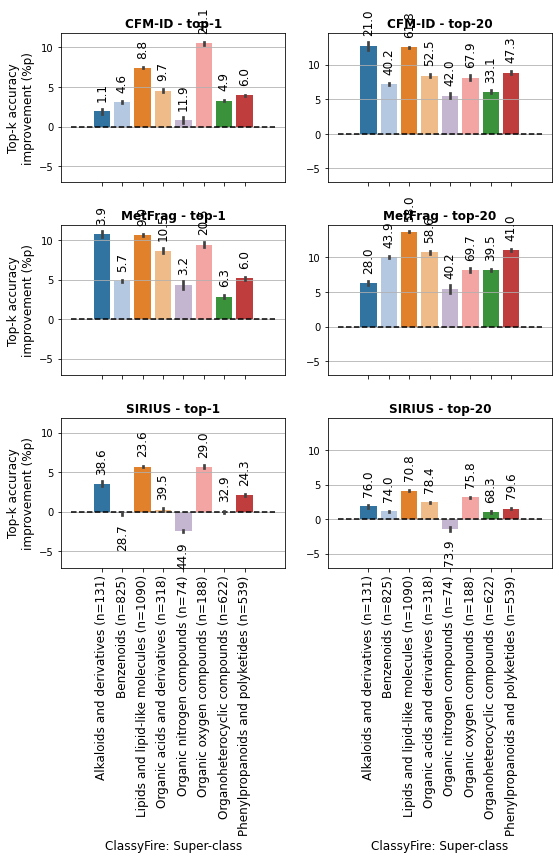

In [7]:
tmp = {}

tmp["superclass"], superlevel = plot__02__a(
    df, min_class_support=50, ks=[1, 20], sharey="col", topk_method="csi", fig_width=4, fig_height=4, colormap_name="fixed", 
    cf_level="superclass", label_rot_angle=90, n_samples=50
)    

for ext in ["pdf", "svg"]:
    plt.savefig(os.path.join(".", os.extsep.join(["plot_02__a", ext])))
    
# Write out data shown in the plot
tmp["superclass"].rename({"top_k_p_msplrt": "top_k_p_lcms2struct"}, axis=1).to_csv("plot_02__a.csv", index=False)

In [8]:
__a__ = tmp["superclass"][(tmp["superclass"]["k"] == 1) & (tmp["superclass"]["ms2scorer"] == "CFM-ID")].round(1)
__a__

,classyfire_superclass,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
0,Alkaloids and derivatives,1.1,3.0,1.9,4979.0,"min=1, max=123, avg=16.2, med=11.0",131,1,CFM-ID,2.5
1,Benzenoids,4.6,7.7,3.1,989.0,"min=1, max=51, avg=2.3, med=1.0",825,1,CFM-ID,25.3
2,Lipids and lipid-like molecules,8.8,16.2,7.4,83.0,"min=1, max=244, avg=11.7, med=3.0",1090,1,CFM-ID,80.9
3,Organic acids and derivatives,9.7,14.3,4.6,619.5,"min=1, max=93, avg=5.8, med=3.0",318,1,CFM-ID,14.5
4,Organic nitrogen compounds,11.9,12.7,0.8,881.5,"min=1, max=18, avg=2.5, med=1.0",74,1,CFM-ID,0.6
5,Organic oxygen compounds,20.1,30.6,10.5,88.5,"min=1, max=154, avg=11.4, med=3.0",188,1,CFM-ID,19.8
6,Organoheterocyclic compounds,4.9,8.2,3.3,982.0,"min=1, max=101, avg=3.6, med=1.0",622,1,CFM-ID,20.4
7,Phenylpropanoids and polyketides,6.0,9.9,3.9,247.0,"min=1, max=113, avg=7.5, med=3.0",539,1,CFM-ID,21.2


In [9]:
__a__ = tmp["superclass"][(tmp["superclass"]["k"] == 1) & (tmp["superclass"]["ms2scorer"] == "MetFrag")].round(1)
__a__

,classyfire_superclass,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
16,Alkaloids and derivatives,3.9,14.7,10.8,4979.0,"min=1, max=123, avg=16.2, med=11.0",131,1,MetFrag,14.1
17,Benzenoids,5.7,10.6,4.8,989.0,"min=1, max=51, avg=2.3, med=1.0",825,1,MetFrag,39.8
18,Lipids and lipid-like molecules,9.0,19.6,10.7,83.0,"min=1, max=244, avg=11.7, med=3.0",1090,1,MetFrag,116.1
19,Organic acids and derivatives,10.5,19.2,8.7,619.5,"min=1, max=93, avg=5.8, med=3.0",318,1,MetFrag,27.5
20,Organic nitrogen compounds,3.2,7.6,4.3,881.5,"min=1, max=18, avg=2.5, med=1.0",74,1,MetFrag,3.2
21,Organic oxygen compounds,20.5,29.9,9.4,88.5,"min=1, max=154, avg=11.4, med=3.0",188,1,MetFrag,17.7
22,Organoheterocyclic compounds,6.3,9.2,2.9,982.0,"min=1, max=101, avg=3.6, med=1.0",622,1,MetFrag,17.8
23,Phenylpropanoids and polyketides,6.0,11.2,5.1,247.0,"min=1, max=113, avg=7.5, med=3.0",539,1,MetFrag,27.7


In [10]:
__a__ = tmp["superclass"][(tmp["superclass"]["k"] == 1) & (tmp["superclass"]["ms2scorer"] == "SIRIUS")].round(1)
__a__

,classyfire_superclass,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
32,Alkaloids and derivatives,38.6,42.1,3.5,4979.0,"min=1, max=123, avg=16.2, med=11.0",131,1,SIRIUS,4.6
33,Benzenoids,28.7,28.5,-0.2,989.0,"min=1, max=51, avg=2.3, med=1.0",825,1,SIRIUS,-1.7
34,Lipids and lipid-like molecules,23.6,29.3,5.7,83.0,"min=1, max=244, avg=11.7, med=3.0",1090,1,SIRIUS,62.1
35,Organic acids and derivatives,39.5,39.7,0.3,619.5,"min=1, max=93, avg=5.8, med=3.0",318,1,SIRIUS,0.9
36,Organic nitrogen compounds,44.9,42.4,-2.5,881.5,"min=1, max=18, avg=2.5, med=1.0",74,1,SIRIUS,-1.8
37,Organic oxygen compounds,29.0,34.7,5.7,88.5,"min=1, max=154, avg=11.4, med=3.0",188,1,SIRIUS,10.7
38,Organoheterocyclic compounds,32.9,32.9,0.0,982.0,"min=1, max=101, avg=3.6, med=1.0",622,1,SIRIUS,0.0
39,Phenylpropanoids and polyketides,24.3,26.4,2.1,247.0,"min=1, max=113, avg=7.5, med=3.0",539,1,SIRIUS,11.3


### Performance for individual ClassyFire classes

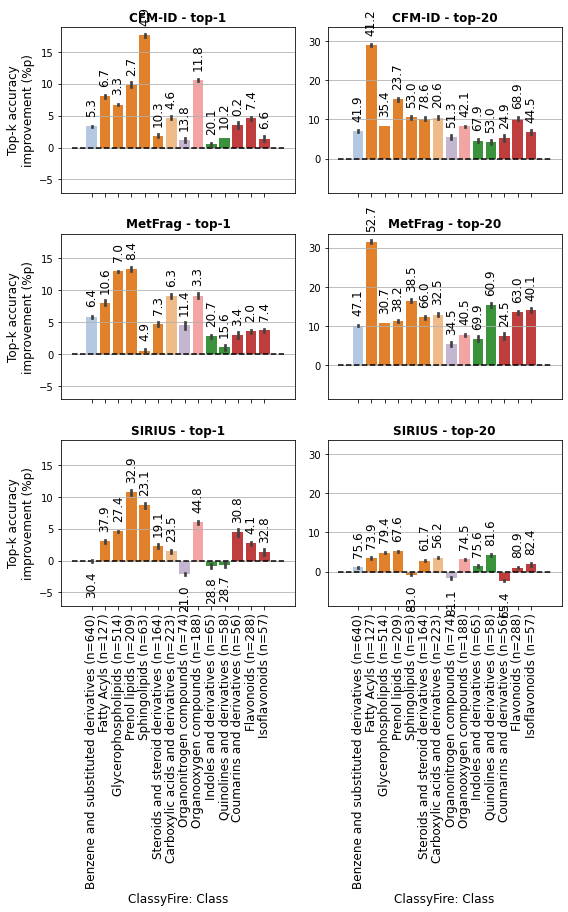

In [11]:
tmp["class"], superlevel = plot__02__a(
    df, min_class_support=50, ks=[1, 20], sharey="col", topk_method="csi", fig_width=4, fig_height=4.25, colormap_name="fixed",
    cf_level="class", label_rot_angle=90, n_samples=50
)

for ext in ["pdf", "svg"]:
    plt.savefig(os.path.join(".", os.extsep.join(["extended_data_figure__performance_per_classyfire_class", ext])))
    
# Write out data shown in the plot
tmp["class"] \
    .rename({"top_k_p_msplrt": "top_k_p_lcms2struct"}, axis=1) \
    .to_csv("extended_data_figure__performance_per_classyfire_class.csv", index=False)

In [12]:
__a__ = tmp["class"][(tmp["class"]["k"] == 1) & (tmp["class"]["ms2scorer"] == "MetFrag")].round(1)
__a__

,classyfire_class,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
28,Benzene and substituted derivatives,6.4,12.3,5.9,1022.5,"min=1, max=41, avg=1.9, med=1.0",640,1,MetFrag,37.5
29,Carboxylic acids and derivatives,10.6,19.8,9.1,2357.0,"min=1, max=93, avg=6.9, med=3.0",223,1,MetFrag,20.4
30,Coumarins and derivatives,7.0,10.0,3.0,377.5,"min=1, max=31, avg=3.6, med=1.0",56,1,MetFrag,1.7
31,Fatty Acyls,8.4,16.5,8.0,1157.0,"min=1, max=72, avg=6.2, med=3.0",127,1,MetFrag,10.2
32,Flavonoids,4.9,8.4,3.5,166.0,"min=1, max=91, avg=8.7, med=3.0",288,1,MetFrag,10.2
33,Glycerophospholipids,7.3,20.3,13.0,75.0,"min=1, max=15, avg=2.3, med=2.0",514,1,MetFrag,66.7
34,Indoles and derivatives,6.3,9.0,2.8,2195.0,"min=1, max=26, avg=3.6, med=1.0",65,1,MetFrag,1.8
35,Isoflavonoids,11.4,15.1,3.8,354.0,"min=1, max=28, avg=4.9, med=1.0",57,1,MetFrag,2.1
36,Organonitrogen compounds,3.3,7.8,4.5,881.5,"min=1, max=18, avg=2.5, med=1.0",74,1,MetFrag,3.3
37,Organooxygen compounds,20.7,29.8,9.2,88.5,"min=1, max=154, avg=11.4, med=3.0",188,1,MetFrag,17.2


In [13]:
__a__ = tmp["class"][(tmp["class"]["k"] == 1) & (tmp["class"]["ms2scorer"] == "SIRIUS")].round(1)
__a__

,classyfire_class,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
56,Benzene and substituted derivatives,30.4,30.3,-0.1,1022.5,"min=1, max=41, avg=1.9, med=1.0",640,1,SIRIUS,-0.5
57,Carboxylic acids and derivatives,37.9,39.3,1.4,2357.0,"min=1, max=93, avg=6.9, med=3.0",223,1,SIRIUS,3.2
58,Coumarins and derivatives,27.4,31.8,4.4,377.5,"min=1, max=31, avg=3.6, med=1.0",56,1,SIRIUS,2.5
59,Fatty Acyls,32.9,36.0,3.0,1157.0,"min=1, max=72, avg=6.2, med=3.0",127,1,SIRIUS,3.9
60,Flavonoids,23.1,25.7,2.7,166.0,"min=1, max=91, avg=8.7, med=3.0",288,1,SIRIUS,7.7
61,Glycerophospholipids,19.1,23.6,4.6,75.0,"min=1, max=15, avg=2.3, med=2.0",514,1,SIRIUS,23.4
62,Indoles and derivatives,23.5,22.6,-0.9,2195.0,"min=1, max=26, avg=3.6, med=1.0",65,1,SIRIUS,-0.6
63,Isoflavonoids,21.0,22.3,1.3,354.0,"min=1, max=28, avg=4.9, med=1.0",57,1,SIRIUS,0.7
64,Organonitrogen compounds,44.8,42.6,-2.2,881.5,"min=1, max=18, avg=2.5, med=1.0",74,1,SIRIUS,-1.6
65,Organooxygen compounds,28.8,34.8,6.0,88.5,"min=1, max=154, avg=11.4, med=3.0",188,1,SIRIUS,11.2


### PubChemLite classes

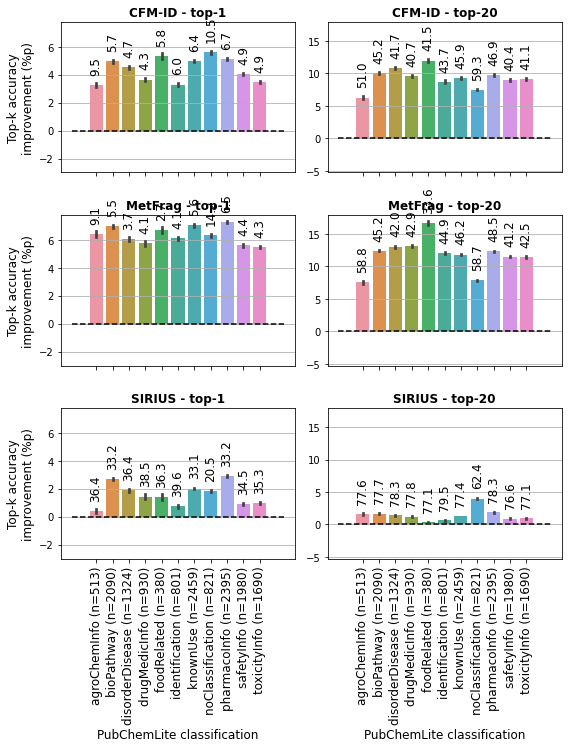

In [12]:
tmp["pubchemlite"] = plot__02__b(
    df, min_class_support=50, ks=[1, 20], sharey="col", topk_method="csi", fig_width=4, fig_height=3.5, n_samples=50
)

for ext in ["pdf", "svg"]:
    plt.savefig(os.path.join(".", os.extsep.join(["plot_02__b", ext])))
    
# Write out data shown in the plot
tmp["pubchemlite"].rename({"top_k_p_msplrt": "top_k_p_lcms2struct"}, axis=1).to_csv("plot_02__b.csv", index=False)

In [15]:
tmp["pubchemlite"][(tmp["pubchemlite"]["k"] == 1) & (tmp["pubchemlite"]["ms2scorer"] == "CFM-ID")].round(1)

,pubchemlite_class,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
0,agroChemInfo,9.5,12.7,3.2,537.0,1,513,1,CFM-ID,16.7
1,bioPathway,5.7,10.7,4.9,540.0,3,2090,1,CFM-ID,103.4
2,disorderDisease,4.7,9.2,4.5,697.0,3,1324,1,CFM-ID,60.0
3,drugMedicInfo,4.3,7.9,3.6,905.0,3,930,1,CFM-ID,33.9
4,foodRelated,5.8,11.2,5.3,684.0,1,380,1,CFM-ID,20.3
5,identification,6.0,9.3,3.3,728.0,1,801,1,CFM-ID,26.4
6,knownUse,6.4,11.4,5.0,569.0,3,2459,1,CFM-ID,122.4
7,noClassification,10.5,16.0,5.6,94.0,1,821,1,CFM-ID,45.9
8,pharmacoInfo,6.7,11.8,5.1,461.0,3,2395,1,CFM-ID,123.0
9,safetyInfo,4.9,9.0,4.0,800.5,1,1980,1,CFM-ID,79.5


In [16]:
tmp["pubchemlite"][(tmp["pubchemlite"]["k"] == 1) & (tmp["pubchemlite"]["ms2scorer"] == "MetFrag")].round(1)

,pubchemlite_class,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
22,agroChemInfo,9.1,15.5,6.4,537.0,1,513,1,MetFrag,32.8
23,bioPathway,5.5,12.4,7.0,540.0,3,2090,1,MetFrag,145.3
24,disorderDisease,3.7,9.7,6.0,697.0,3,1324,1,MetFrag,80.1
25,drugMedicInfo,4.1,9.8,5.8,905.0,3,930,1,MetFrag,53.6
26,foodRelated,2.7,9.4,6.7,684.0,1,380,1,MetFrag,25.4
27,identification,4.1,10.2,6.1,728.0,1,801,1,MetFrag,48.8
28,knownUse,5.6,12.6,7.0,569.0,3,2459,1,MetFrag,172.7
29,noClassification,14.2,20.6,6.3,94.0,1,821,1,MetFrag,52.0
30,pharmacoInfo,6.5,13.7,7.3,461.0,3,2395,1,MetFrag,174.4
31,safetyInfo,4.4,10.0,5.6,800.5,1,1980,1,MetFrag,110.7


In [17]:
tmp["pubchemlite"][(tmp["pubchemlite"]["k"] == 1) & (tmp["pubchemlite"]["ms2scorer"] == "SIRIUS")].round(1)

,pubchemlite_class,top_k_p_onlyms,top_k_p_msplrt,top_k_p_improvement,n_cand,n_isomers,n_class_support,k,ms2scorer,improvement_in_n
44,agroChemInfo,36.4,36.8,0.4,537.0,1,513,1,SIRIUS,1.9
45,bioPathway,33.2,35.9,2.7,540.0,3,2090,1,SIRIUS,55.9
46,disorderDisease,36.4,38.3,1.9,697.0,3,1324,1,SIRIUS,24.9
47,drugMedicInfo,38.5,40.0,1.4,905.0,3,930,1,SIRIUS,13.4
48,foodRelated,36.3,37.7,1.4,684.0,1,380,1,SIRIUS,5.4
49,identification,39.6,40.4,0.7,728.0,1,801,1,SIRIUS,5.9
50,knownUse,33.1,35.1,2.0,569.0,3,2459,1,SIRIUS,49.5
51,noClassification,20.5,22.3,1.8,94.0,1,821,1,SIRIUS,15.1
52,pharmacoInfo,33.2,36.2,2.9,461.0,3,2395,1,SIRIUS,69.8
53,safetyInfo,34.5,35.4,0.9,800.5,1,1980,1,SIRIUS,18.1
